# Rede Neural Simples para Conversão de Temperatura  

Neste projeto, implementamos uma **rede neural simples** para prever a conversão de temperaturas de Celsius para Fahrenheit. Embora o modelo seja baseado em uma rede neural, **não utilizamos função de ativação**.

A rede neural tem apenas **uma camada**, onde a entrada (temperatura em Celsius) é multiplicada por um peso \(w\) e somada a um **bias** \(b\), para gerar a saída (temperatura em Fahrenheit). A fórmula do modelo é:

\[
F = w \cdot C + b
\]

Onde:
- \( F \) é a temperatura em Fahrenheit (saída esperada),
- \( C \) é a temperatura em Celsius (entrada do modelo),
- \( w \) é o peso (coeficiente angular da reta),
- \( b \) é o bias (deslocamento da reta).

A rede é treinada usando **gradiente descendente** para minimizar o **erro quadrático médio (MSE)** entre as previsões e os valores reais. Ao longo de várias épocas, o modelo ajusta seus parâmetros para encontrar a melhor solução.

Este modelo simples serve como uma introdução aos conceitos de redes neurais, mas sem a complexidade das funções de ativação e múltiplas camadas. 🚀


In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Configuração do estilo dos gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(10,8)


Equação da reta

    
    Calcula os valores de uma reta linear com um possível ruído adicionado.

    Parâmetros:
    - x: valores de entrada (array)
    - w: inclinação da reta (coeficiente angular)
    - b: intercepto (bias)
    - noise_scale: intensidade do ruído aleatório (quanto maior, mais variação nos pontos)

    Retorna:
    - Valores da reta com ruído adicido
    """

In [3]:
# Função para gerar uma reta linear com ruído opcional
def get_linear_curve(x,w,b=0,noise_scale=0):
    return w*x+b+noise_scale*np.random.randn(x.shape[0])

**Gerando os dados de treinamento**

Estamos simulando uma conversão de temperatura, por isso usamos:
- Inclinação da reta (w) = 1.8 (conversão de °C para °F)
- Bias (b) ≈ 30 (aproximando a conversão)o)


In [4]:
x=np.arange(-10,38,1)
Y=get_linear_curve(x,1.8,32,noise_scale=5)

In [5]:
Y.shape,x.shape

((48,), (48,))

Text(0, 0.5, '°F')

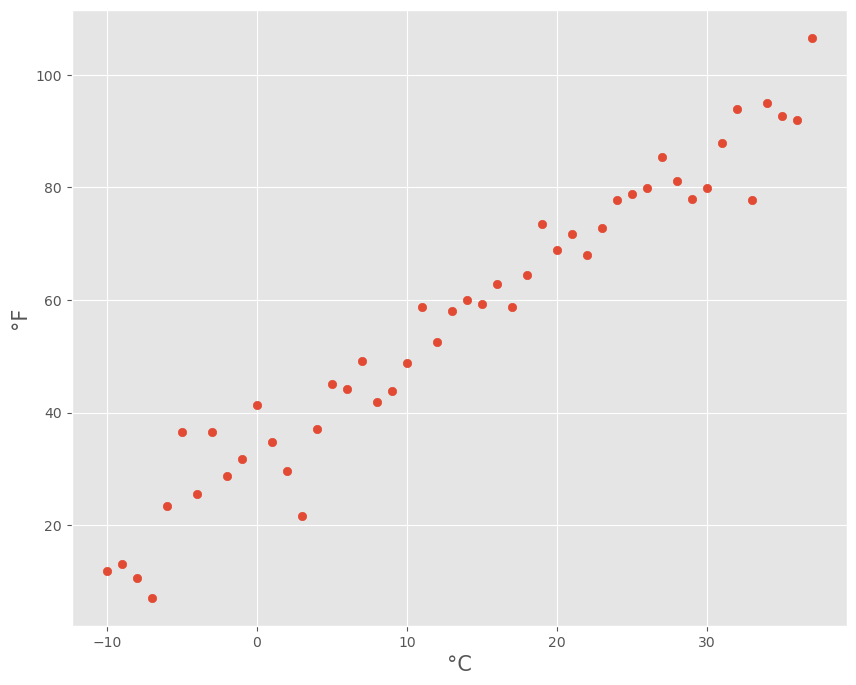

In [6]:
# Plotando os pontos gerados
plt.scatter(x,Y)
plt.xlabel('°C',fontsize=15)
plt.ylabel('°F',fontsize=15)

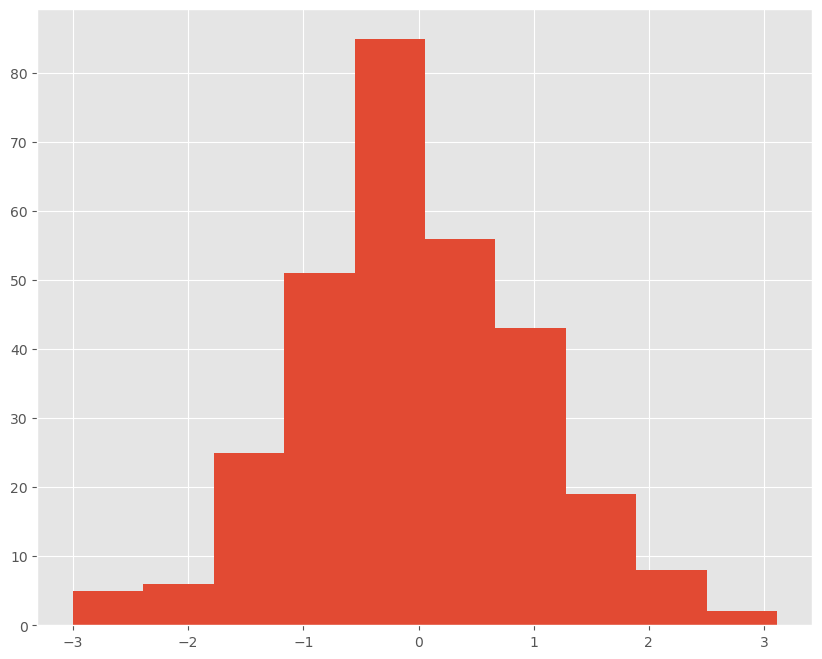

In [7]:
plt.hist(np.random.randn(300));

Modelo
-inicializarpeso e bias
-Feedforward(: dados entram, passam pelas camadas e saem.)
-Calcular a perda
-Backpropagation(ajusta os pesos da rede reduzindo o erro, indo da saída para a entrada.)

In [8]:
# Inicialização dos pesos e bias para o modelo 
w=np.random.rand(1)
b=0

In [9]:
## Função para calcular a saída do modelo (hipótese)
def forward(input,w,b):
    return w*input+b

Função de erro MSE
    Calcula o erro quadrático médio (MSE) entre os valores reais e os previstos.

    Parâmetros:
    - Y: valores reais
    - y: valores previstos pelo modelo

    Retorna:
    - O erro quadrático médio (MSE)


In [12]:
def mse(Y,y):
    return(Y-y)**2

Backpropagation

**Backpropagation**

Ajusta os pesos e bias com base no gradiente do erro.

**Parâmetros:**

* *input*: valores de entrada
* *output*: valores previstos pelo modelo
* *target*: valores reais esperados
* *w*: peso atual do modelo
* *b*: bias atual do modelo
* *lr*: taxa de aprendizado

**Retorna:**

Novos valores de *w* e *b* ajustados pelo gradiente descendentente
    """

In [13]:
def backpropagation(input,output,target,w,b,lr):
    dw=lr*(-2*input*(target-output)).mean()  # Gradiente em relação ao peso
    db=lr*(-2*(target-output)).mean() # Gradiente em relação ao bias

    w-=dw #peso
    b-=db #bias
    return w,b

 Treina o modelo ajustando os pesos e bias.

    Parâmetros:
    - input: valores de entrada
    - target: valores reais esperados
    - w: peso inicial
    - b: bias inicial
    - epochs: número de épocas (iterações de treinamento)
    - lr: taxa de aprendizado

    Retorna:
    - Pesos e bias ajustados após o treinamento
    

In [14]:
def model_fit(input,target,w,b,epochs=200,lr=0.001):
    for epoch in range(epochs):
        output=forward(input,w,b)
        loss=np.mean(mse(target,output))
        w,b=backpropagation(input,output,target,w,b,lr)
        if(epoch+1)% (epochs /10)==0:
            print(f'Epoch: [{(epoch+1)}/{epochs}] Loss:[{loss:.4f}]')
    return w,b

**Função calculate_r2(target, predicted):**

Essa função calcula o R 2
 , que mede o quão bem o modelo  se ajusta aos dados. Um R 2
  de 1 indica um ajuste perfeito, enquanto um R 2
  de 0 indica que o modelo não explica nenhuma da variância nos dados.

Parâmetros:

target: Os valores reais (observados) da variável dependente.
predicted: Os valores previstos pelo modelo para a variável dependente.

In [15]:
def calculate_r2(target, predicted):
    mean_target = np.mean(target)
    ss_total = np.sum((target - mean_target) ** 2)
    ss_residual = np.sum((target - predicted) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [16]:
x=np.arange(-10,30,2)
Y=get_linear_curve(x,w=1.8,b=32,noise_scale=1)

In [17]:
w=np.random.randn(1)
b=np.zeros(1)

In [18]:
w,b=model_fit(x,Y,w,b,epochs=2500,lr=0.003)
print(f'w:{w[0]:.3f},b:{b[0]:.3f}')

Epoch: [250/2500] Loss:[101.4917]
Epoch: [500/2500] Loss:[16.3797]
Epoch: [750/2500] Loss:[3.1917]
Epoch: [1000/2500] Loss:[1.1482]
Epoch: [1250/2500] Loss:[0.8315]
Epoch: [1500/2500] Loss:[0.7825]
Epoch: [1750/2500] Loss:[0.7749]
Epoch: [2000/2500] Loss:[0.7737]
Epoch: [2250/2500] Loss:[0.7735]
Epoch: [2500/2500] Loss:[0.7735]
w:1.805,b:32.275


In [23]:
predicted_Y = forward(x, w, b)
r2_score = calculate_r2(Y, predicted_Y)
print("precisão : "f'R² Score: {r2_score:.4f}')

precisão : R² Score: 0.9982


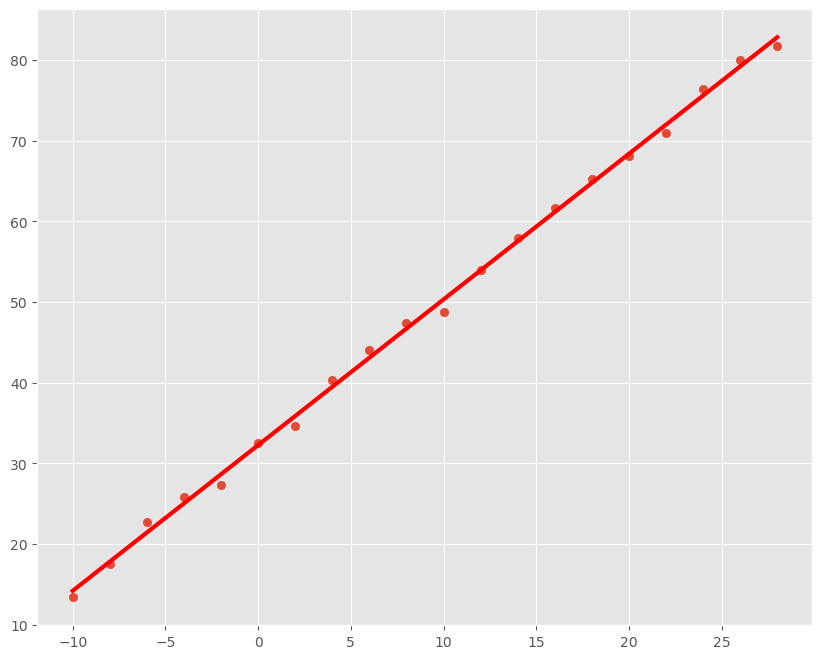

In [20]:
plt.scatter(x,Y)
plt.plot(x,get_linear_curve(x,w,b),'r',lw=3)